## Ames Housing Data Set

### Dealing with Outlier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df1.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

<AxesSubplot:>

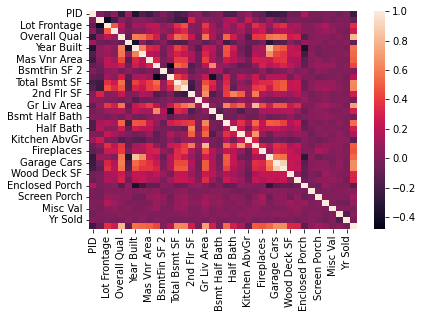

In [5]:
sns.heatmap(df1.corr())

In [6]:
df1.corr()['SalePrice'].sort_values() 

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

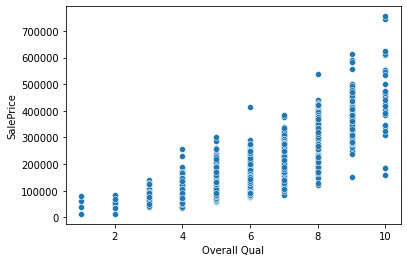

In [7]:
sns.scatterplot(x='Overall Qual', y= 'SalePrice', data=df1)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

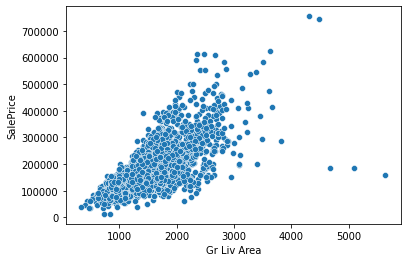

In [8]:
sns.scatterplot(x='Gr Liv Area', y= 'SalePrice', data=df1)

In [9]:
df1[(df1['Overall Qual']>8) & (df1['SalePrice']<200000)] # Below datas are outlier and need to droped 

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [10]:
drop_index = df1[(df1['Gr Liv Area']>4000) & (df1['SalePrice']<200000)].index

In [11]:
df1 =df1.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

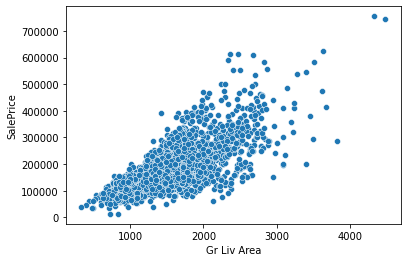

In [12]:
sns.scatterplot(x='Gr Liv Area', y= 'SalePrice', data=df1)

In [13]:
df1.shape

(2927, 81)

### Dealing with missing data

In [14]:
# with open('Ames_Housing_Feature_Description.txt', 'r') as f:
#     print(f.read())

In [15]:
df2 = pd.read_csv('Ames_outliers_removed.csv')

In [16]:
# df2.info()

In [17]:
df2.shape

(2927, 81)

In [18]:
df2 = df2.drop('PID', axis = 1) # PID droped not useful

In [19]:
df2.shape

(2927, 80)

In [20]:
# df2.isnull().sum().sort_values(ascending=False)

In [21]:
def percentage_missing(df2):
    missing_data= (df2.isnull().sum().sort_values(ascending=False) * 100)/len(df2) # percentage of data missing
    missing_data =missing_data[missing_data>0]
    return missing_data

In [22]:
missing_data = percentage_missing(df2)

In [23]:
missing_data

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Qual        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Electrical         0.034165
Total Bsmt SF      0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
dtype: float64

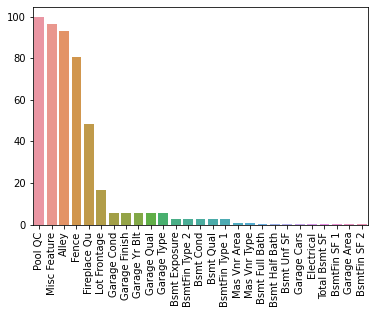

In [24]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
plt.show()

### Dealing with 1 percent of  missing data

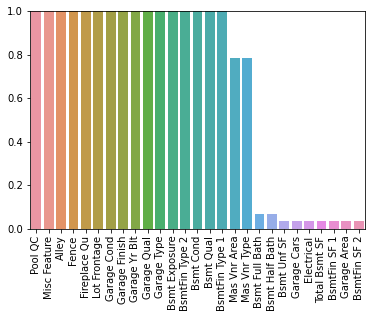

In [25]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

Checking missing rows are same ?

In [26]:
df2[df2['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [27]:
df2 = df2.dropna(axis=0, subset=['Electrical', 'Garage Area'])

In [28]:
missing_data = percentage_missing(df2)
missing_data

Pool QC           99.589744
Misc Feature      96.410256
Alley             93.230769
Fence             80.478632
Fireplace Qu      48.547009
Lot Frontage      16.752137
Garage Cond        5.401709
Garage Yr Blt      5.401709
Garage Finish      5.401709
Garage Qual        5.401709
Garage Type        5.367521
Bsmt Exposure      2.837607
BsmtFin Type 2     2.769231
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
Mas Vnr Area       0.786325
Mas Vnr Type       0.786325
Bsmt Half Bath     0.068376
Bsmt Full Bath     0.068376
BsmtFin SF 1       0.034188
Total Bsmt SF      0.034188
Bsmt Unf SF        0.034188
BsmtFin SF 2       0.034188
dtype: float64

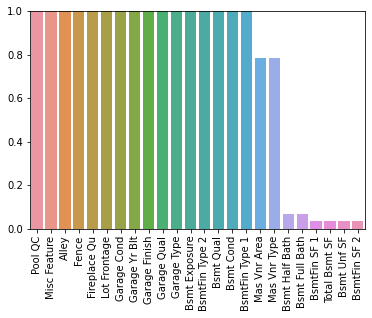

In [29]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [30]:
df2[df2['BsmtFin SF 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [31]:
df2[df2['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [32]:
df2[df2['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


We should not drop due to for some columns, Nan means no basement


Basement numeric column =>0

Basement string columns => None Sting

In [33]:
# Every columns that is related to basement are numeric

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

df2[bsmt_num_cols] = df2[bsmt_num_cols].fillna(value=0)


# other are filled with None string

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df2[bsmt_str_cols] = df2[bsmt_str_cols].fillna('None')

In [34]:
missing_data = percentage_missing(df2)
missing_data

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Yr Blt     5.401709
Garage Type       5.367521
Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
dtype: float64

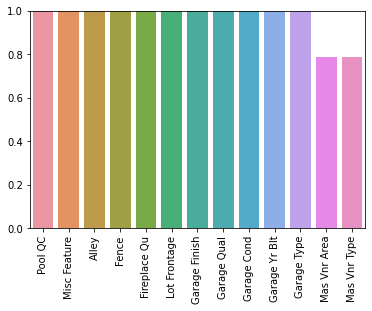

In [35]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [36]:
df2['Mas Vnr Type']= df2['Mas Vnr Type'].fillna('None')

df2['Mas Vnr Area']= df2['Mas Vnr Area'].fillna(0)

In [37]:
missing_data = percentage_missing(df2)
missing_data

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Qual       5.401709
Garage Cond       5.401709
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Type       5.367521
dtype: float64

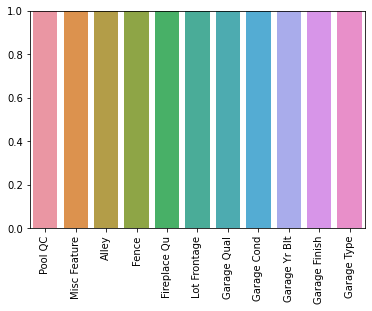

In [38]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

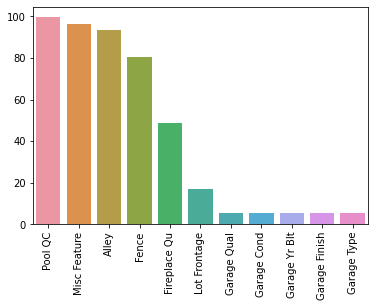

In [39]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
# plt.ylim(0,1)
plt.show()

1 percent missing data is solved 

### Dealing with maximum missing data

In [40]:
df2 = df2.drop(['Pool QC','Misc Feature','Alley','Fence'], axis = 1)

In [41]:
missing_data = percentage_missing(df2)
missing_data

Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Finish     5.401709
Garage Cond       5.401709
Garage Qual       5.401709
Garage Yr Blt     5.401709
Garage Type       5.367521
dtype: float64

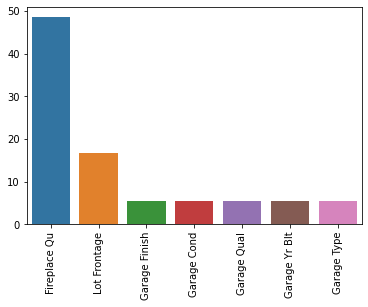

In [42]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
# plt.ylim(0,1)
plt.show()

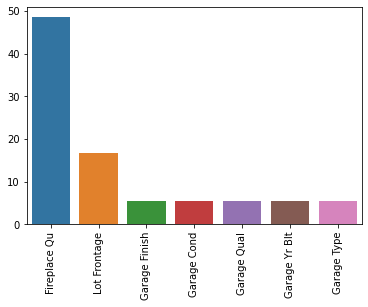

In [43]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
# plt.ylim(0,1)
plt.show()

### Dealing with remaining missing data

In [44]:
cols= ['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']

df2[cols] =df2[cols].fillna('None')


df2['Garage Yr Blt'] = df2['Garage Yr Blt'].fillna(0)

In [45]:
missing_data = percentage_missing(df2)
missing_data

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

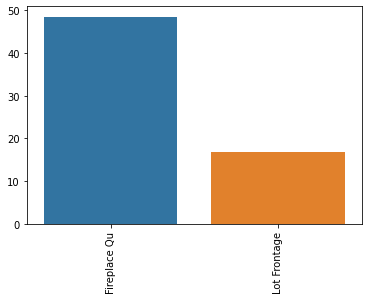

In [46]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
# plt.ylim(0,1)
plt.show()

In [47]:
df2['Fireplace Qu']= df2['Fireplace Qu'].fillna('Nane')

In [48]:
df2['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

Need to use Statistcal estimate to fill this columns

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

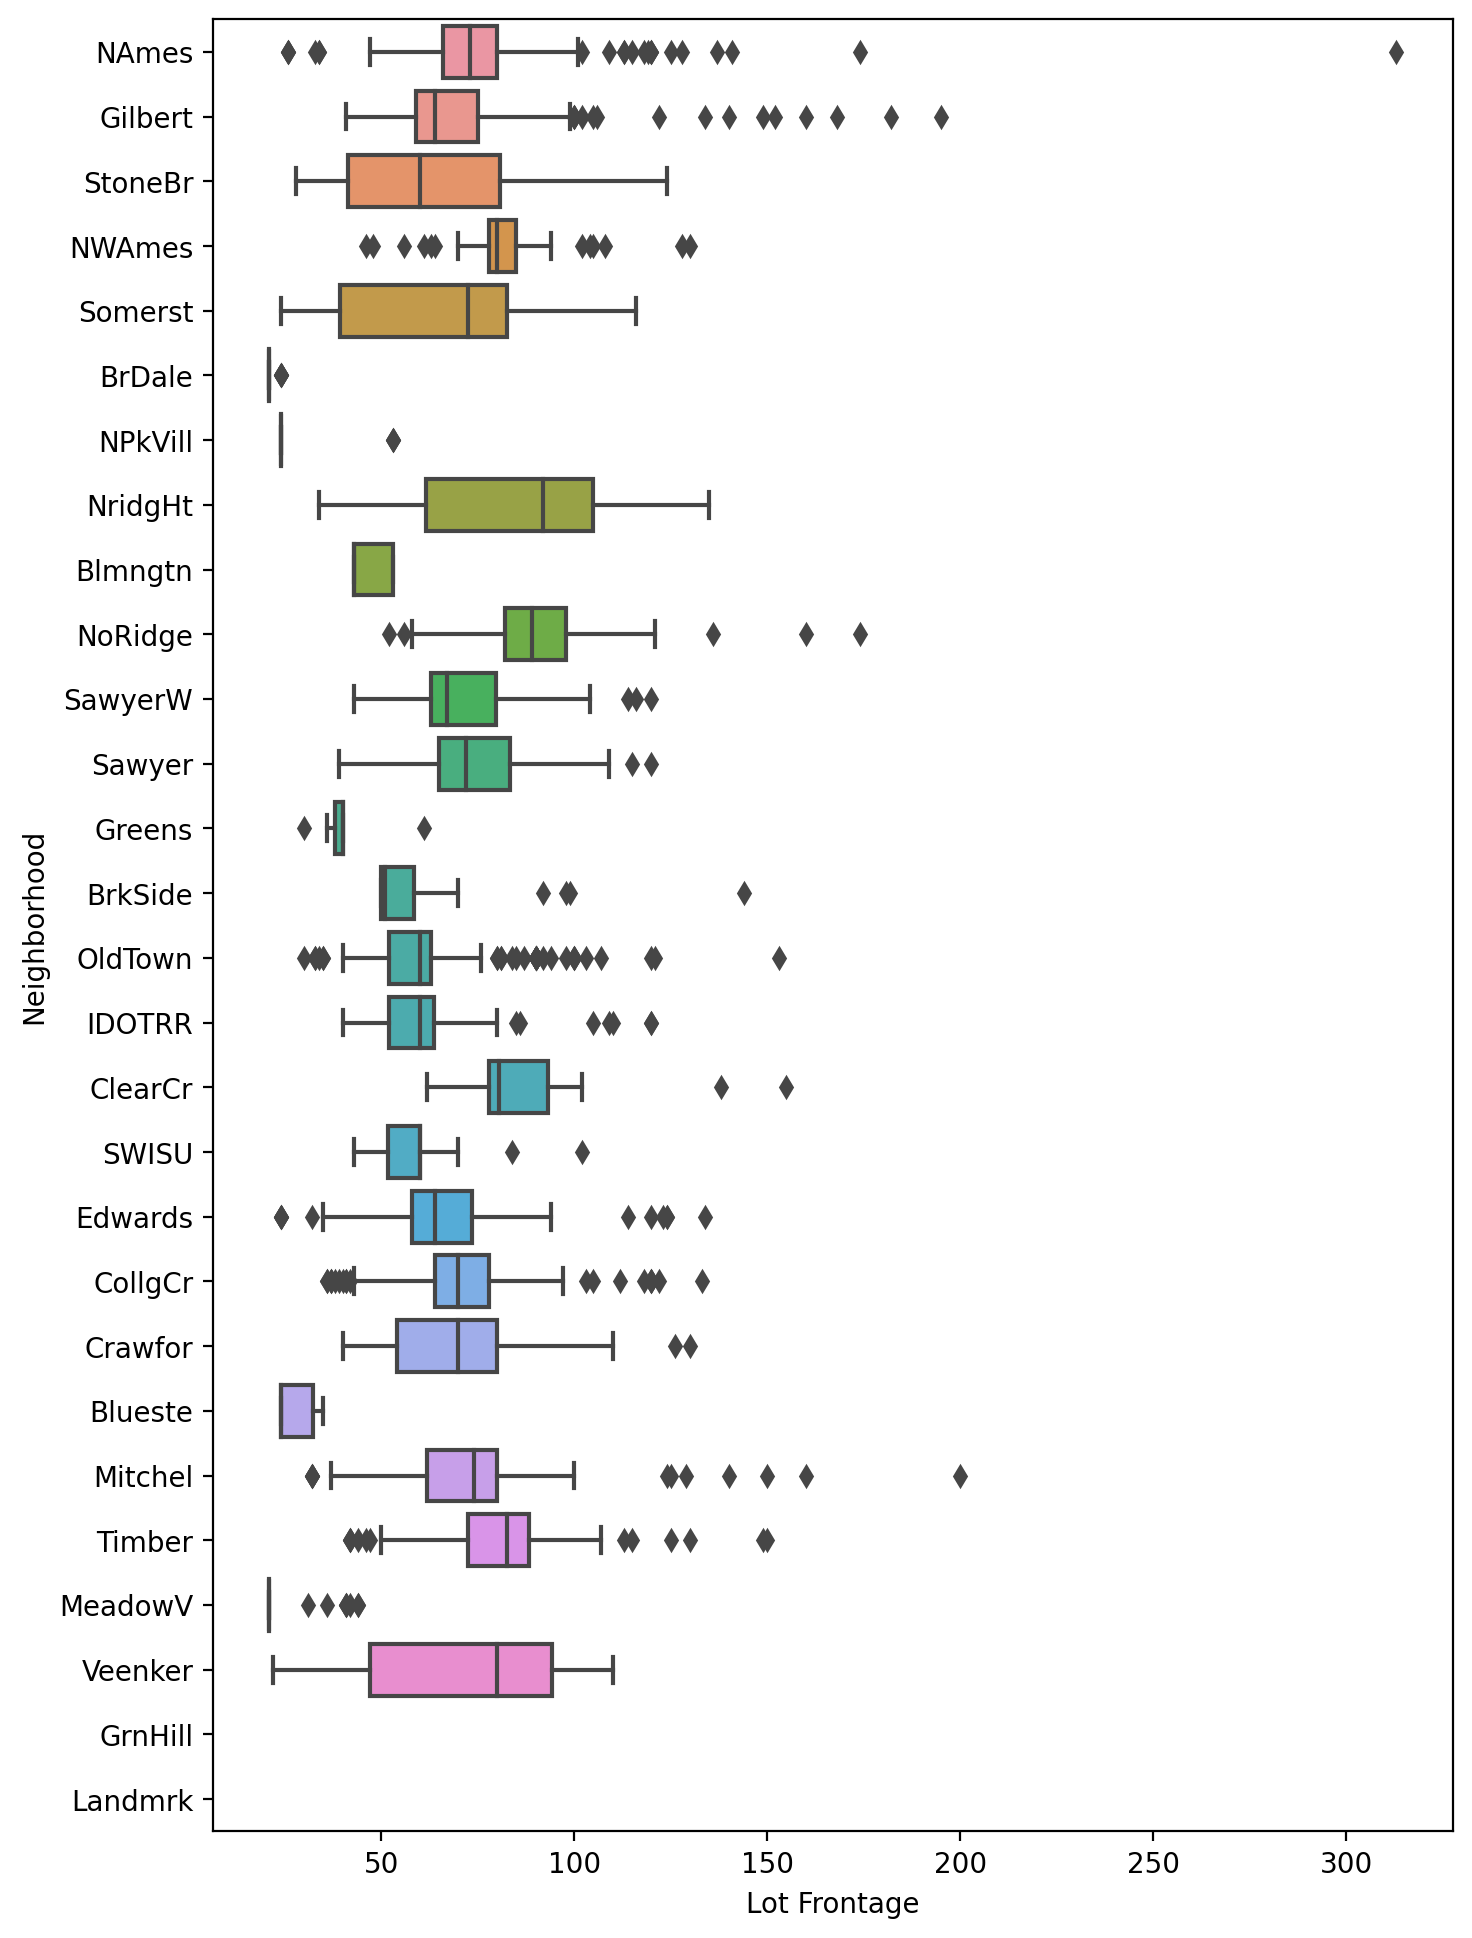

In [49]:
fig, ax = plt.subplots(figsize=(8,12), dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data= df2)

In [50]:
df2['Lot Frontage'] = df2.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

In [51]:
missing_data = percentage_missing(df2)
missing_data

Lot Frontage    0.102564
dtype: float64

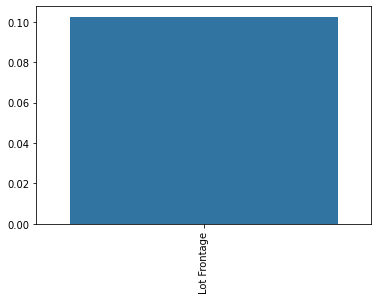

In [52]:
fig, ax = plt.subplots()
sns.barplot(x = missing_data.index, y = missing_data.values)
plt.xticks(rotation = 90)
# plt.ylim(0,1)
plt.show()

In [53]:
df2.isnull().sum().sort_values(ascending = False)

Lot Frontage    3
MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
               ..
Exter Qual      0
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
SalePrice       0
Length: 76, dtype: int64

In [54]:
df2['Lot Frontage'] = df2['Lot Frontage'].fillna(0)

In [55]:
df2.isnull().sum().sort_values(ascending = False)

MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
Functional      0
               ..
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
SalePrice       0
Length: 76, dtype: int64

### Dealing with Categorical data

In [56]:
# with open('Ames_Housing_Feature_Description.txt') as f:
#     print(f.read())

In [57]:
df3= pd.read_csv('Ames_NO_Missing_Data.csv')

In [58]:
df3.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000


In [59]:
df3.isnull().sum() <0 # No null values

MS SubClass       False
MS Zoning         False
Lot Frontage      False
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 76, dtype: bool

In [60]:
pd.set_option('display.max_columns', None) # show all columns
df3.select_dtypes(include='object')  # select only object data columns

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [61]:
# df3.info()

In [62]:
# df3['MS SubClass'] =df3['MS SubClass'].apply(str) # converting Numberic datatype into object for study

In [63]:
df3_object = df3.select_dtypes(include='object')
df3_numeric = df3.select_dtypes(exclude='object')

In [64]:
df3_dummies = pd.get_dummies(df3_object)
df3_dummies.head(2)

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_Fi

In [65]:
df3_final= pd.concat([df3_numeric,df3_dummies], axis =1)

In [66]:
df3_final.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr

In [67]:
df3_final.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 299, dtype: float64